# Unify all information

#### In this notebook we are going to unite all the data frames that we have worked with until now. For this it is important that they have the same base.

##### This base will be country and year. Because in the different files we can find the same country written in a different way, we are going to use the file "99_Unify_Countries" to have all the countries written in the same way.

##### In addition, to the weapon df we will add a column with a classification of weapons thanks to the file "99_Labels_Weapons". In this way we can see what kind of weapons are exported and bought by each country.

- Like always, first of all, import packages and read all .csv files.

In [140]:
import pandas as pd
import numpy as np

In [190]:
mg   = pd.read_csv("01_Output_Migrations.csv",            sep = ";", encoding = 'latin1', dtype={'people':np.int32})
hdi  = pd.read_csv("02_Output_HumanDevelopmentIndex.csv", sep = ";", encoding = 'latin1')
wb   = pd.read_csv("04_Output_WorldBankData.csv",         sep = ",", encoding = 'latin1')
wp   = pd.read_csv("05_Output_Weapons.csv",               sep = ";", encoding = 'latin1')
aux1 = pd.read_csv("99_Unify_Countries.csv",              sep = ";", encoding = 'latin1')
aux2 = pd.read_csv("99_Labels_Weapons.csv",               sep = ";", encoding = 'latin1')

- We start with the file of sale of arms. We are going to replace the names of the original countries of this df with the names that we have obtained from the world data bank.

- In addition, we will add the column that will classify by type of weapon, and we will save this df in case we want to treat it independently.

In [191]:
wp = pd.merge(wp, aux1, how ='left', left_on = ['country_supplier'], right_on = ['country_weapons'])

wp = wp.drop(['country_supplier', 'country_weapons', 'country_migrations'], axis = 1)

wp = wp.rename(columns = {'country': 'country_supplier',
                          'iso3c'  : 'iso3c_supplier',
                          'region' : 'region_supplier',
                          'long'   : 'long_supplier',
                          'lat'    : 'lat_supplier'})

wp = pd.merge(wp, aux1, how='left', left_on = ['country_recipient'], right_on = ['country_weapons'])

wp = wp.drop(['country_recipient', 'country_weapons', 'country_migrations'], axis = 1)

wp = wp.rename(columns = {'country': 'country_recipient',
                          'iso3c'  : 'iso3c_recipient',
                          'region' : 'region_recipient',
                          'long'   : 'long_recipient',
                          'lat'    : 'lat_recipient'})

wp['supplier-recipient'] = wp['country_supplier'] + ' - ' + wp['country_recipient']



cols_order = ['country_supplier',   'country_recipient',  'supplier-recipient', 'iso3c_supplier',  'iso3c_recipient',
              'weapon_designation', 'weapon_description', 'year_of_order',   'year_of_deliveries',
              'number_ordered',     'number_delivered',   'region_supplier', 'region_recipient',
              'long_supplier',      'lat_supplier',       'long_recipient',  'lat_recipient',      'comments']

wp = wp[cols_order]

wp = pd.merge(wp, aux2, how ='left', left_on = ['weapon_description'], right_on = ['Weapon type'])
wp = wp.drop(['Weapon type'], axis = 1)
wp = wp.rename(columns = {'Label': 'weapon_classification'})

wp.to_csv('06_Output_Weapons.csv', header = True, sep = ';', encoding = 'utf-8', index = False, decimal = ",")

wp.head(3)

,country_supplier,country_recipient,supplier-recipient,iso3c_supplier,iso3c_recipient,weapon_designation,weapon_description,year_of_order,year_of_deliveries,number_ordered,number_delivered,region_supplier,region_recipient,long_supplier,lat_supplier,long_recipient,lat_recipient,comments,weapon_classification
0,Albania,Burkina Faso,Albania - Burkina Faso,ALB,BFA,M-43 120mm,Mortar,2011,2011,12.0,12,Europe & Central Asia,Sub-Saharan Africa,19.81720,41.3317,-1.53395,12.36050,Probably second-hand,Estructuras defensivas
1,Algeria,Angola,Algeria - Angola,DZA,AGO,N-262 Fregate,Transport aircraft,1980,1980,4.0,4,Middle East & North Africa,Sub-Saharan Africa,3.05097,36.7397,13.24200,-8.81155,Second-hand; incl for MP,Aviones
2,Algeria,Nigeria,Algeria - Nigeria,DZA,NGA,Il-28,Bomber aircraft,1967,1968,2.0,2,Middle East & North Africa,Sub-Saharan Africa,3.05097,36.7397,7.48906,9.05804,Second-hand,Aviones


- We do the same with the migration file

In [192]:
mg = pd.merge(mg, aux1, how='left', left_on = ['country_origin'], right_on = ['country_migrations'])

mg = mg.drop(['country_origin', 'country_weapons', 'country_migrations'], axis = 1)

mg = mg.rename(columns = {'country': 'country_origin',
                          'iso3c'  : 'iso3c_origin',
                          'region' : 'region_origin',
                          'long'   : 'long_origin',
                          'lat'    : 'lat_origin'})


mg = pd.merge(mg, aux1, how='left', left_on = ['country_destination'], right_on = ['country_migrations'])

mg = mg.drop(['country_destination', 'country_weapons', 'country_migrations'], axis = 1)

mg = mg.rename(columns = {'country': 'country_destination',
                          'iso3c'  : 'iso3c_destination',
                          'region' : 'region_destination',
                          'long'   : 'long_destination',
                          'lat'    : 'lat_destination'})

cols_order = ['country_origin', 'country_destination', 'iso3c_origin',     'iso3c_destination',
              'years',          'people',              'region_origin',    'region_destination',
              'long_origin',    'lat_origin',          'long_destination', 'lat_destination']

mg = mg[cols_order]

mg.to_csv('06_Output_Migrations.csv', header = True, sep = ';', encoding = 'utf-8', index = False, decimal = ",")

mg.head(3)

,country_origin,country_destination,iso3c_origin,iso3c_destination,years,people,region_origin,region_destination,long_origin,lat_origin,long_destination,lat_destination
0,Pakistan,Afghanistan,PAK,AFG,1990,8107,South Asia,South Asia,72.8000,30.5167,69.1761,34.5228
1,Tajikistan,Afghanistan,TJK,AFG,1990,40537,Europe & Central Asia,South Asia,68.7864,38.5878,69.1761,34.5228
2,Uzbekistan,Afghanistan,UZB,AFG,1990,2027,Europe & Central Asia,South Asia,69.2690,41.3052,69.1761,34.5228


- Do the same with the HDI file

In [193]:
hdi = pd.merge(hdi, aux1, how='left', left_on = ['Country'], right_on = ['country_hdi'])
hdi = hdi.drop(['Country', 'iso3c', 'long', 'lat', 'region', 'country_weapons',
                'country_migrations', 'country_hdi'], axis = 1)

hdi = hdi.rename(columns = {'country': 'Country'})
hdi['HDI'] = hdi['HDI'].astype(float)

- We transform weapons files and migrations. We need the numerical variables to be grouped by country and year.

- The HDI file is already grouped by country and year so we do not need to transform it.

- In this way we could add this information to the file of the world data bank and have a single data frame with all the information.

In [194]:
wp_groupby_supplier  = wp.groupby(['country_supplier','year_of_deliveries'])['number_delivered'].sum().reset_index()
wp_groupby_recipient = wp.groupby(['country_recipient','year_of_deliveries'])['number_delivered'].sum().reset_index()

In [195]:
mg['people']           = mg['people'].astype(int)
mg_groupby_origin      = mg.groupby(['country_origin','years'])['people'].sum().reset_index()
mg_groupby_destination = mg.groupby(['country_destination','years'])['people'].sum().reset_index()

In [196]:
wp_groupby_delivered = wp.groupby(['year_of_deliveries'])['number_delivered'].sum().reset_index()

- Warning: when we read the final data frame resulting from this code in Power BI we have problems with the way of writing "'Congo, Dem. Rep." and "'Congo, Rep." so we're going to replace it.

In [197]:
wb['Country'] = wb['Country'].replace({'Congo, Dem. Rep.': 'Democratic Republic of Congo'})
wb['Country'] = wb['Country'].replace({'Congo, Rep.': 'Congo'})

- Finally, we gather all the data sources.

In [198]:
# world bank data - arms dealers
df = pd.merge(wb, wp_groupby_supplier, how = 'left', left_on  = ['Country', 'Year']
                                                   , right_on = ['country_supplier', 'year_of_deliveries'])

df = df.drop(['country_supplier', 'year_of_deliveries'], axis = 1)
df = df.rename(columns = {'number_delivered': 'weapons_delivered'})

# df - arms buyer 
df = pd.merge(df, wp_groupby_recipient, how = 'left', left_on  = ['Country', 'Year']
                                                    , right_on = ['country_recipient', 'year_of_deliveries'])

df = df.drop(['country_recipient', 'year_of_deliveries'], axis = 1)
df = df.rename(columns = {'number_delivered': 'weapons_received'})

# df - weapons delivered by year
df = pd.merge(df, wp_groupby_delivered, how = 'left', left_on  = ['Year']
                                                    , right_on = ['year_of_deliveries'])

df = df.drop(['year_of_deliveries'], axis = 1)
df = df.rename(columns = {'number_delivered': 'anual_weapons_deliveries'})

# df - emigrants
df = pd.merge(df, mg_groupby_origin, how = 'left', left_on  = ['Country', 'Year']
                                                 , right_on = ['country_origin', 'years'])

df = df.drop(['country_origin', 'years'], axis = 1)
df = df.rename(columns = {'people': 'emigration'})

# df - inmigrants
df = pd.merge(df, mg_groupby_destination, how = 'left', left_on  = ['Country', 'Year']
                                                      , right_on = ['country_destination', 'years'])

df = df.drop(['country_destination', 'years', 'Unnamed: 0'], axis = 1)
df = df.rename(columns = {'people': 'inmigration'})

# df - hdi
df = pd.merge(df, hdi, how = 'left', left_on  = ['Country', 'Year']
                                   , right_on = ['Country', 'Year'])

df.head(3)

,Country,Region,long,lat,Year,Population,Fertility,LifeExpectancy,Gini,weapons_delivered,weapons_received,anual_weapons_deliveries,emigration,inmigration,HDI
0,Andorra,Europe & Central Asia,1.5218,42.5075,2017,76965.0,NaN,NaN,NaN,NaN,NaN,48714,7653.0,35262.0,0.858
1,Andorra,Europe & Central Asia,1.5218,42.5075,2016,77281.0,NaN,NaN,NaN,NaN,NaN,63030,NaN,NaN,0.856
2,Andorra,Europe & Central Asia,1.5218,42.5075,2015,78014.0,NaN,NaN,NaN,NaN,NaN,58848,1748.0,39552.0,0.854


- We calculate some columns of interest

In [199]:
df['p_emigration_pop']      = df['emigration']  / df['Population']
df['p_inmigration_pop']     = df['inmigration'] / df['Population']
df['p_weapons_delivered']   = df['weapons_delivered'] / df['anual_weapons_deliveries']
df['p_weapons_received']    = df['weapons_received']  / df['anual_weapons_deliveries']

df['log_population']        = np.log(df['Population']) 
df['log_emigration']        = np.log(df['emigration']) 
df['log_inmigration']       = np.log(df['inmigration']) 
df['log_weapons_delivered'] = np.log(df['weapons_delivered']) 
df['log_weapons_received']  = np.log(df['weapons_received']) 

# replace Nan with 0 for weapons delivered/received
df['weapons_delivered'] = df['weapons_delivered'].fillna(0)
df['weapons_received']  = df['weapons_received'].fillna(0)

In [200]:
# When we graph in power bi we detect that a country in 1990 has a migration value> population. Drop it.
df = df.drop(df[df['p_emigration_pop'] > 1].index)

- Save as .csv 

In [201]:
df.to_csv('06_Output_All.csv', header = True, sep = ';', encoding = 'latin-1', index = False, decimal = ",")

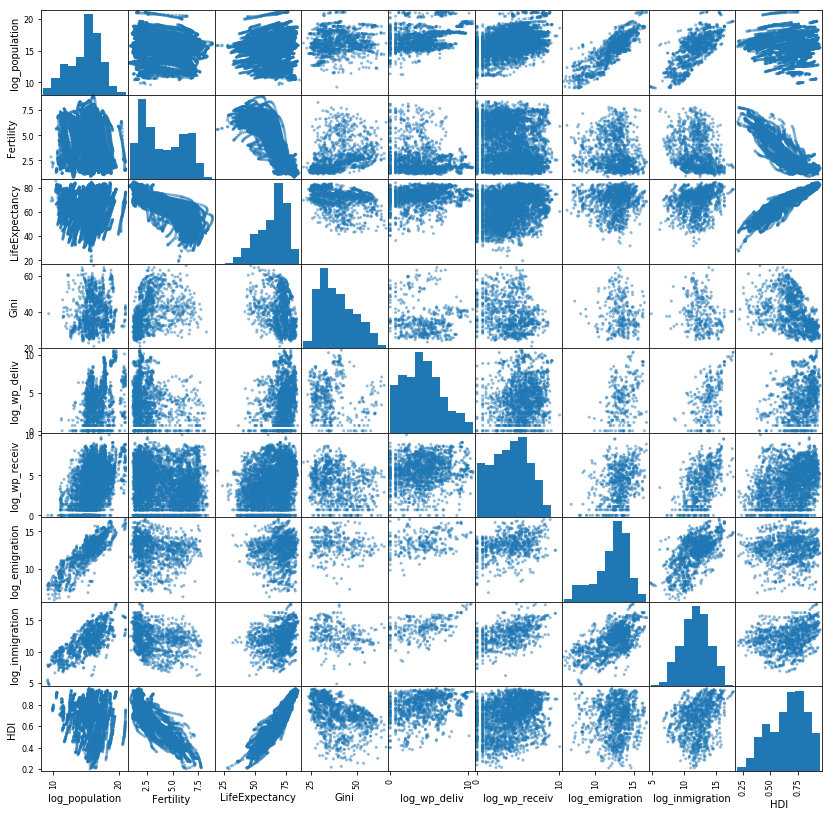

In [202]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

names = ['log_population', 'Fertility', 'LifeExpectancy', 'Gini', 'log_weapons_delivered', 
         'log_weapons_received', 'log_emigration', 'log_inmigration', 'HDI']

df_to_plot = df[names]

df_to_plot = df_to_plot.rename(columns = {'log_weapons_delivered': 'log_wp_deliv',
                                          'log_weapons_received':  'log_wp_receiv'})

scatter_matrix(df_to_plot, figsize = (14,14))
plt.show()

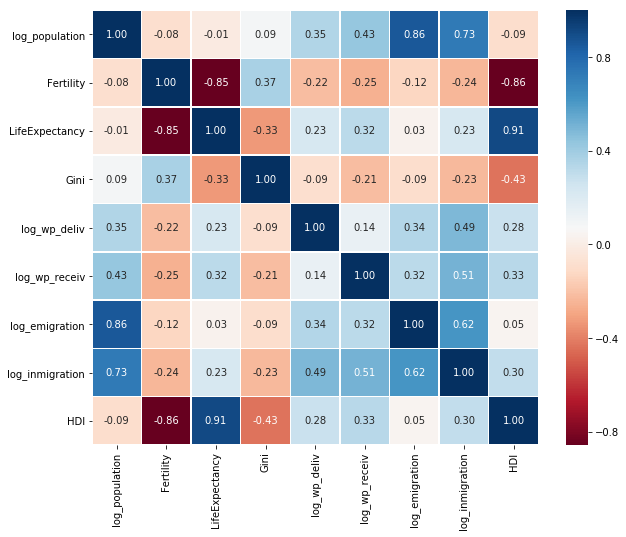

In [203]:
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(df_to_plot.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap='RdBu')

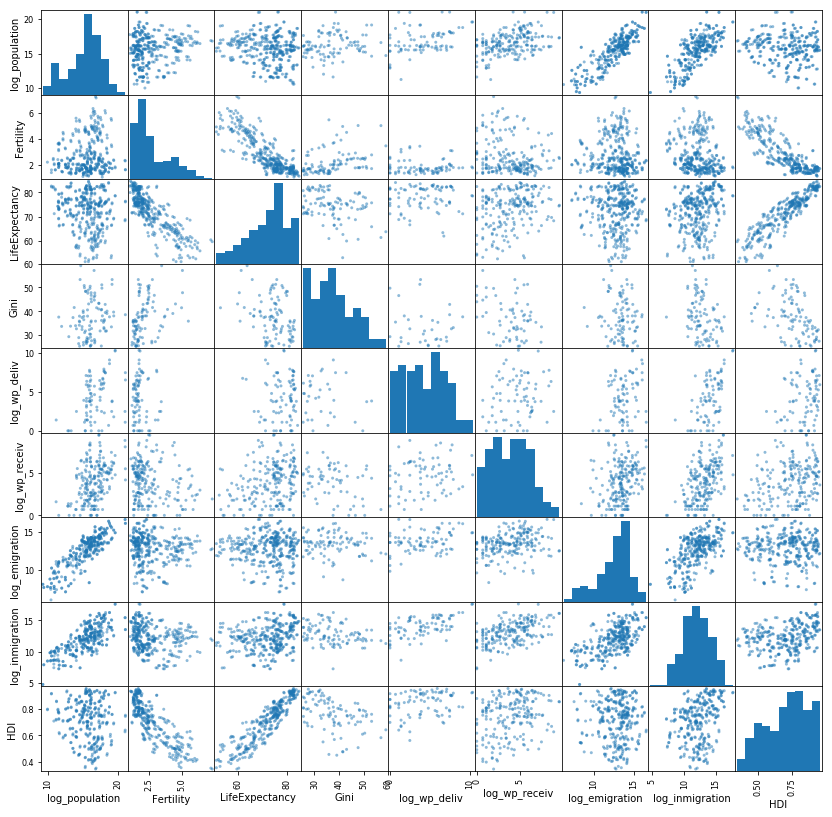

In [204]:
df = df[df['Year'].isin([2015,2017])]

names = ['log_population', 'Fertility', 'LifeExpectancy', 'Gini', 'log_weapons_delivered', 
         'log_weapons_received', 'log_emigration', 'log_inmigration', 'HDI']

df_to_plot = df[names]

df_to_plot = df_to_plot.rename(columns = {'log_weapons_delivered': 'log_wp_deliv',
                                          'log_weapons_received':  'log_wp_receiv'})

scatter_matrix(df_to_plot, figsize = (14,14))
plt.show()

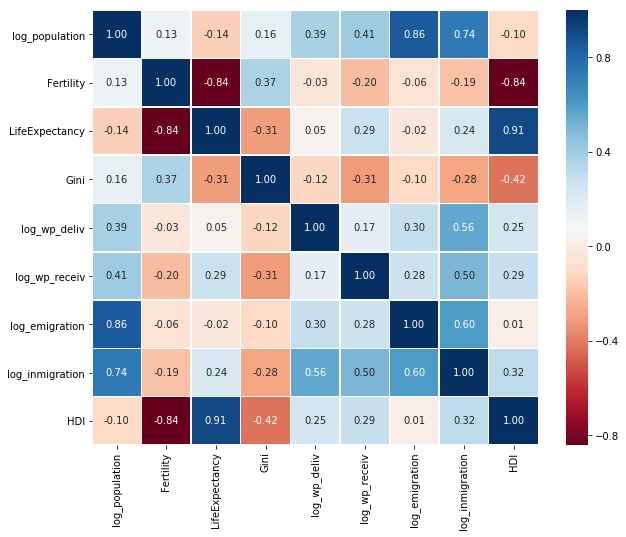

In [205]:
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(df_to_plot.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap='RdBu')